* Name: `dissipation-theory--Study-21.ipynb`
* Author: John A. Marohn
* Date: 2024-07-15
* Continued from: ``dissipation-theory--Study-19.ipynb``, ``dissipation-theory--Study-20.ipynb``
* Continued to: ---
* Summary: I have created a new module, `dissipation2.py`, in which the semiconductor properties are input in terms of conductivity and charge density instead of mobility and charge density.  Explore the new module.

# Preliminaries

In [1]:
import numpy as np
from lmfit import Model, Parameters

In [2]:
%matplotlib inline
import matplotlib.pylab as plt

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)
plt.rcParams['figure.figsize'] = 3.25, 3.5

In [3]:
from dissipationtheory.constants import ureg
from dissipationtheory.dissipation2 import CantileverModel, SampleModel1, SampleModel2
from dissipationtheory.dissipation2 import CantileverModelJit, SampleModel1Jit, SampleModel2Jit, theta1norm_jit
from dissipationtheory.dissipation  import blds_perpendicular_jit
from dissipationtheory.data import BLDSData

In [4]:
THIS = 'dissipation-theory--Study-21--'
fig = {}

# Define cantilever and sample objects

Check that the sample objects print out the derived roll-off frequency and mobility.

In [5]:
cantilever = CantileverModel(
    f_c = ureg.Quantity(75, 'kHz'), 
    V_ts = ureg.Quantity(1, 'V'), 
    R = ureg.Quantity(30, 'nm'), 
    d = ureg.Quantity(200, 'nm')
)

In [6]:
sample1 = SampleModel1(
    cantilever = cantilever,
    h_s = ureg.Quantity(3000., 'nm'),
    epsilon_s = ureg.Quantity(complex(20.0, -2), ''),
    sigma = ureg.Quantity(1E-8, 'S/m'),
    rho = ureg.Quantity(1e21, '1/m^3'),
    epsilon_d = ureg.Quantity(complex(20.0, -2), ''),
    z_r = ureg.Quantity(300, 'nm')
)

In [7]:
sample1

cantilever

      resonance freq = 75.000 kHz
                     = 4.712e+05 rad/s
  tip-sample voltage = 1.000 V
              radius = 30.000 nm
              height = 200.000 nm

semiconductor

             epsilon (real) = 20.000
             epsilon (imag) = -2.000
                  thickness = 3e+03 nm
               conductivity = 1.000e-08 S/m
             charge density = 1.000e+21 m^{-3}
           reference height = 3.000e+02 nm

        roll-off frequency  = 1.129e+03 Hz
                   mobility = 6.242e-11 m^2/(V s)
         diffusion constant = 1.614e-12 m^2/s
               Debye length = 3.780e+01 nm
           diffusion length = 1.850e+00 nm
   effective epsilon (real) = 20.000
   effective epsilon (imag) = -2.002

dielectric

  epsilon (real) = 20.000
  epsilon (imag) = -2.000
       thickness = infinite

In [8]:
sample2 = SampleModel2(
    cantilever = cantilever,
    h_d = ureg.Quantity(0., 'nm'),
    epsilon_d = ureg.Quantity(complex(20.0, -2), ''),
    epsilon_s = ureg.Quantity(complex(20.0, -2), ''),
    sigma = ureg.Quantity(1E-8, 'S/m'),
    rho = ureg.Quantity(1e21, '1/m^3'),
    z_r = ureg.Quantity(300, 'nm')
)

In [9]:
sample2

cantilever

      resonance freq = 75.000 kHz
                     = 4.712e+05 rad/s
  tip-sample voltage = 1.000 V
              radius = 30.000 nm
              height = 200.000 nm

dielectric

  epsilon (real) = 20.000
  epsilon (imag) = -2.000
       thickness = 0.0 nm

semiconductor

             epsilon (real) = 20.000
             epsilon (imag) = -2.000
                  thickness = infinite
               conductivity = 1.000e-08 S/m
             charge density = 1.00e+21 m^{-3}
           reference height = 300.0 nm

         roll-off frequency = 1.129e+03 Hz
                   mobility = 6.24e-11 m^2/(V s)
         diffusion constant = 1.61e-12 m^2/s
               Debye length = 37.8 nm
           diffusion length = 1.9 nm
   effective epsilon (real) = 20.000
   effective epsilon (imag) = -2.002


In [10]:
cantilever_jit = CantileverModelJit(
    f_c = 75e3, 
    V_ts = 1.0,
    R = 30e-9,
    d = 200e-9
)

In [11]:
sample1_jit = SampleModel1Jit(
    cantilever = cantilever_jit,
    h_s = 3000e-9,
    epsilon_s = complex(20, -2),
    sigma = 1e-8,
    rho = 1e21,
    epsilon_d = complex(20, -2),
    z_r = 300e-9
)

In [12]:
sample1_jit.print()

cantilever
   cantilever freq =  75000.0 Hz
                   =  471238.89803846896 rad/s
tip-sample voltage =  1.0 V
            radius =  3e-08 m
            height =  2e-07 m

semiconductor
          epsilon (real) =  20.0
          epsilon (imag) =  -2.0
               thickness =  3e-06 m
            conductivity =  1e-08 S/m
          charge density =  1e+21 m^{{-3}}
        reference height =  3e-07 m
 
      roll-off frequency =  1129.409067373019 Hz
                mobility =  6.241509090043337e-11 m^2/(V s)
      diffusion constant =  1.6135549206567651e-12 m^2/s
            Debye length =  3.7797775481848936e-08 m
        diffusion length =  1.8504242453115994e-09 m
effective epsilon (real) =  20.0
effective epsilon (imag) =  -2.0023966804779363

dielectric
 epsilon (real) =  20.0
 epsilon (imag) =  -2.0
      thickness = infinite


In [13]:
sample2_jit = SampleModel2Jit(
    cantilever = cantilever_jit,
    h_d = 0,
    epsilon_d = complex(20, -2),
    epsilon_s = complex(20, -2),
    sigma = 1e-8,
    rho = 1e21,
    z_r = 300e-9
)

In [14]:
sample2_jit.print()

cantilever
   cantilever freq =  75000.0 Hz
                   =  471238.89803846896 rad/s
tip-sample voltage =  1.0 V
            radius =  3e-08 m
            height =  2e-07 m

dielectric
 epsilon (real) =  20.0
 epsilon (imag) =  -2.0
      thickness =  0.0 m

semiconductor
          epsilon (real) =  20.0
          epsilon (imag) =  -2.0
               thickness = infinite
            conductivity =  1e-08 S/m
                mobility =  6.241509090043337e-11 m^2/(V s)
        reference height =  3e-07 m
 
      roll-off frequency =  1129.409067373019 Hz
      diffusion constant =  1.6135549206567651e-12 m^2/s
          charge density =  1e+21 m^{{-3}}
            Debye length =  3.7797775481848936e-08 m
        diffusion length =  1.8504242453115994e-09 m
effective epsilon (real) =  20.0
effective epsilon (imag) =  -2.0023966804779363


# Plot of roll-off frequency versus conductivity

Reproduce the roll-off frequency versus conductivity plot in ``dissipation-theory--Study-20``, only now let the sample object compute the roll-off frequency from the given mobility instead of computing the roll-off frequency ourselves.  Create an array of conductivity values with units:

In [15]:
conductivity = ureg.Quantity(
    np.logspace(
        start=np.log10(0.9e-10),
        stop=np.log10(1.1e-4),
        num=51), 'S/m')

Loop over the conductivity, setting the sample conductivity, and saving the associated roll-off frequency.

In [16]:
omega0 = ureg.Quantity(np.zeros_like(conductivity), 'Hz')

sigma0 = sample1.sigma

for index, sigma in enumerate(conductivity):
    
    sample1.sigma = sigma
    omega0[index] = sample1.omega0 

sample1.sigma = sigma0

Make a nice plot.

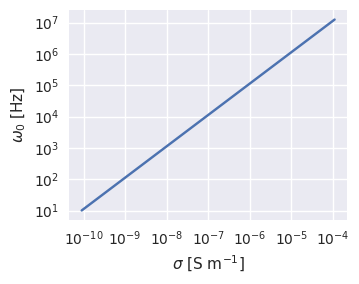

In [17]:
fig['01'] = plt.figure(figsize=(3.75, 3))
with plt.style.context('seaborn-v0_8'):
    plt.loglog(conductivity.to('S/m').magnitude, 
               omega0.to('Hz').magnitude)
plt.ylabel('$\omega_0$ [Hz]')
plt.xlabel('$\\sigma$ [S m$^{-1}$]')
plt.xticks([1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4])
plt.yticks([1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7])
plt.tight_layout()
plt.show()

# Plot the BLDS sigma for various conductivities and charge densities

A range of modulation frequencies going down to very low frequency, so we can see the zero-frequency limit.

In [18]:
omega_m = ureg.Quantity(
    np.logspace(
        start=np.log10(1e-2),
        stop=np.log10(1e8),
        num=51), 'Hz')

A range of conductivities.

In [19]:
sigma = ureg.Quantity(
    np.logspace(
        start=np.log10(1e-10),
        stop=np.log10(1e-4),
        num=7), 'S/m')

The following computation takes a minute.

In [20]:
data = {}        # many simulations
data['01'] = {}  # the first simulation

# remember
sigma0 = sample1_jit.sigma
rho0 =  sample1_jit.rho

sample1_jit.rho = 1e21
for sigma_ in sigma:
    
    freq = ureg.Quantity(np.zeros_like(omega_m), 'Hz')
    sample1_jit.sigma = sigma_.to('S/m').magnitude
    
    for index, omega_ in enumerate(omega_m):
        freq[index] = blds_perpendicular_jit(
            theta1norm_jit,
            sample1_jit,
            omega_).to('Hz')
    
    data['01'][str(sigma_)] = {
        'x': omega_m,
        'y': freq, 
        'sigma': sample1_jit.sigma, 
        'rho': sample1_jit.rho}

# reset
sample1_jit.rho = rho0
sample1_jit.sigma = sigma0

A service function.

In [21]:
def plotme(data, sample_jit):

    fig = plt.figure(figsize=(5,4))
    for key in data.keys():
        
        with plt.style.context('seaborn-v0_8'):
            plt.semilogx(
                data[key]['x'].to('Hz').magnitude,
                np.abs(data[key]['y'].to('Hz').magnitude),
                '-',
                label="{:0.1e}, {:0.1e}".format(
                    data[key]['sigma'],
                    data[key]['rho']))

    lbl = '$d = $ {:0.1f} nm, $R = $ {:0.1f} nm'.format(
        sample_jit.cantilever.d/1e-9,
        sample_jit.cantilever.R/1e-9)
    
    plt.title(lbl, fontsize=9)
    plt.legend(title='$\\sigma$ [S/m], $\\rho$ [1/m$^3$]', 
               title_fontsize=9,
               fontsize=8,
               loc=(1.04, 0),
               frameon=False)
    
    plt.ylabel('|$\Delta f_{\mathrm{BLDS}}$| [Hz]')
    plt.xlabel('mod. frequency $\omega_{\mathrm{m}}$ [rad/s]')
    plt.tight_layout()
    plt.show()
    return fig

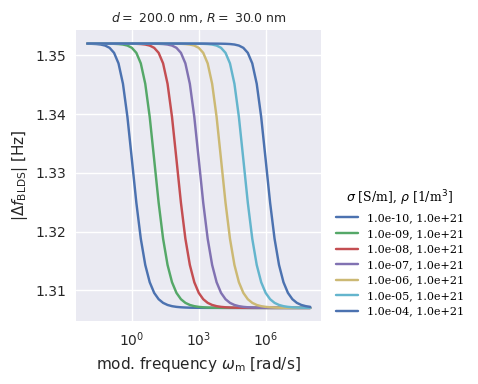

In [22]:
fig['02'] = plotme(data['01'], sample1_jit)

Pick a conductivity in the middle and vary the charge density.

In [23]:
rho = ureg.Quantity(np.logspace(start=np.log10(1e18), stop=np.log10(1e25), num=9), '1/m^3')

With the conductivity fixed, vary the charge density.

In [24]:
data['02'] = {}  # the second simulation

# remember
sigma0 = sample1_jit.sigma
rho0 =  sample1_jit.rho

sample1_jit.sigma = 1.0e-6
for rho_ in rho:
    
    freq = ureg.Quantity(np.zeros_like(omega_m), 'Hz')
    sample1_jit.rho = rho_.to('1/m^3').magnitude
    
    for index, omega_ in enumerate(omega_m):
        freq[index] = blds_perpendicular_jit(
            theta1norm_jit,
            sample1_jit,
            omega_).to('Hz')
        
    data['02'][str(rho_)] = {
        'x': omega_m, 
        'y': freq, 
        'sigma': sample1_jit.sigma,
        'rho': sample1_jit.rho}

# reset
sample1_jit.rho = rho0
sample1_jit.sigma = sigma0

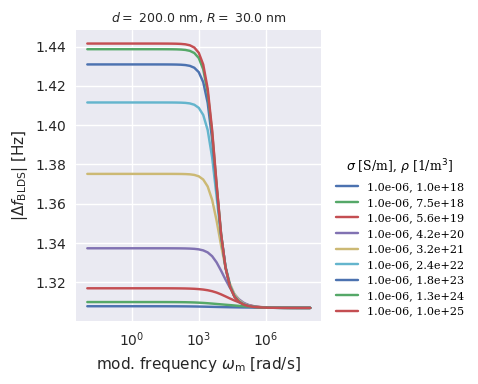

In [25]:
fig['03'] = plotme(data['02'], sample1_jit)

# Fitting data

In [26]:
filepath = ['~','Dropbox','EFM_Data_workup','pm6-y6-paper-blds-data','pm6-y6','ito','pm6-y6-ito-2']

In [27]:
database = {}
database['A'] = {'filename': '230531-085452-BLDS-pm6-y6-3-dark.tsv', 'I [mW/cm^2]' : 0}
database['B'] = {'filename': '230531-085907-BLDS-pm6-y6-3-50mA.tsv', 'I [mW/cm^2]' : 0.84}
database['C'] = {'filename': '230531-090350-BLDS-pm6-y6-3-56mA.tsv', 'I [mW/cm^2]' : 5.4}
database['D'] = {'filename': '230531-090844-BLDS-pm6-y6-3-61mA.tsv', 'I [mW/cm^2]' : 54}
database['E'] = {'filename': '230531-091339-BLDS-pm6-y6-3-66mA.tsv', 'I [mW/cm^2]' : 103}
database['F'] = {'filename': '230531-091846-BLDS-pm6-y6-3-71mA.tsv', 'I [mW/cm^2]' : 154}

In [28]:
sample_jit = SampleModel1Jit(
    cantilever = CantileverModelJit(
        f_c = 75e3, 
        V_ts = 1.0,
        R = 30e-9,
        d = 200e-9),
    h_s = 110e-9, 
    epsilon_s = complex(3.4, 0),
    sigma = 1e-10,
    rho = 1e21,
    epsilon_d = complex(1e6, 0),
    z_r = 110e-9
)

In [29]:
class BLDSData2(BLDSData):

    def fitfunc(self, x, separation, conductivity, density):
        """A function used internally to fit the BLDS spectrum to theory.
        
        :param np.array x: modulation-frequency data
        :param float separation: tip-sample separation [nm]
        :param float conductivity: sample conductivity [:math:`10^{-8} \\mathrmm{S}/\\mathrm{m}`]
        :param float density: sample charge density [:math:`10^{21} \\mathrm{m}^{-3}`]

        The conductivity and charge density are in units of :math:`10^{-8} \\mathrmm{S}/\\mathrm{m}` and
        :math:`10^{21} \\mathrm{m}^{-3}`, respectively.  This is so that the parameters passed to the curve-fitting
        function are likely to be between about 0.001 and 1000. 
        """

        self.sample_jit.cantilever.d = separation * 1e-9
        self.sample_jit.sigma = conductivity * 1e-8
        self.sample_jit.rho = density * 1e21
        
        omega_m = ureg.Quantity(x, 'Hz')
        blds = ureg.Quantity(np.zeros_like(x), 'Hz')
        for index, omega_ in enumerate(omega_m):
                blds[index] = blds_perpendicular_jit(
                    theta1norm_jit,
                    self.sample_jit,
                    omega_).to('Hz')
        
        return abs(blds.to('Hz').magnitude)

    def fitguess(self, separation, conductivity, density):
        """Create an initial guess for curve fitting.
        The same initial guess is used at each light intensity.
        
        :param float separation: tip-sample separation [nm]
        :param float conductivity: sample conductivity [:math:`10^{-8} \\mathrmm{S}/\\mathrm{m}`]
        :param float density: sample charge density [:math:`10^{21} \\mathrm{m}^{-3}`]
        """

        self.guess = True
        self.separation = separation
        self.sigma = conductivity
        self.rho = density

        for key in self.database.keys():
            self.database[key]['y_calc'] = self.fitfunc(self.database[key]['x'], separation, conductivity, density)
            
    def fit(self):
        """For each BLDS spectrum, find an optimimum tip-sample separation, conductivity, and charge density."""

        # Set up the fit
        
        self.fitted=True
        gmodel = Model(self.fitfunc)

        pars= Parameters() 
        pars.add('separation', value=self.separation, min=5, max=5000)
        pars.add('conductivity', value=self.sigma, min=1e-4, max=1e4)
        pars.add('density', value=self.rho, min=1e-4, max=1e4)

        # Loop over all keys and fit the blds data
        
        for key in self.database.keys():

            print('fitting dataset {:}'.format(key))

            result = gmodel.fit(
                self.database[key][self.plotkey],
                x=self.database[key]['x'],
                params=pars)
            
            self.database[key]['result'] = result
            self.database[key]['y_calc'] = result.best_fit
            self.database[key]['values'] = {
                'separation': ureg.Quantity(result.params['separation'].value, 'nm'),
                'conductivity': ureg.Quantity(1e-8 * result.params['conductivity'].value, 'S/m'),
                'density': ureg.Quantity(1e21 * result.params['density'].value, '1/m^3')}            
            self.database[key]['stderr'] = {
                'separation': ureg.Quantity(result.params['separation'].stderr, 'nm'),
                'conductivity': ureg.Quantity(1e-8 * result.params['conductivity'].stderr, 'S/m'),
                'density': ureg.Quantity(1e21 * result.params['density'].stderr, '1/m^3')}
       
        # Create conductivity dictionary containing intensities and conductivity (values and error bars) 
        # with units. Compute a conductivity error bar by propagating error
        
        I_val = ureg.Quantity(np.zeros(len(self.database)), 'mW/cm^2')
        
        for index, key in enumerate(self.database.keys()):
        
            I_val[index] =  ureg.Quantity(self.database[key]['I [mW/cm^2]'], 'mW/cm^2')
            
            sigma_val = self.database[key]['values']['conductivity']
            sigma_err = self.database[key]['stderr']['conductivity']

            rho_val = self.database[key]['values']['density']        
            rho_err = self.database[key]['stderr']['density']

       # Create a dictionary of separation, conductivity, and density.
       # There is some rearranging to do, from a list of items with units, 
       # to a numpy array with one unit for the whole array.
  
        for finding in ['separation', 'conductivity', 'density']:
            
            unit = self.database[key]['values'][finding].units
            y = np.array([self.database[key]['values'][finding].to(unit).magnitude for key in self.database.keys()])
            yerr = np.array([self.database[key]['stderr'][finding].to(unit).magnitude for key in self.database.keys()])
            
            self.findings[finding] = {
                'x': I_val,
                'y': ureg.Quantity(y, unit),
                'yerr': ureg.Quantity(yerr, unit)
            }

In [30]:
D = BLDSData2(THIS, filepath, database, sample_jit)

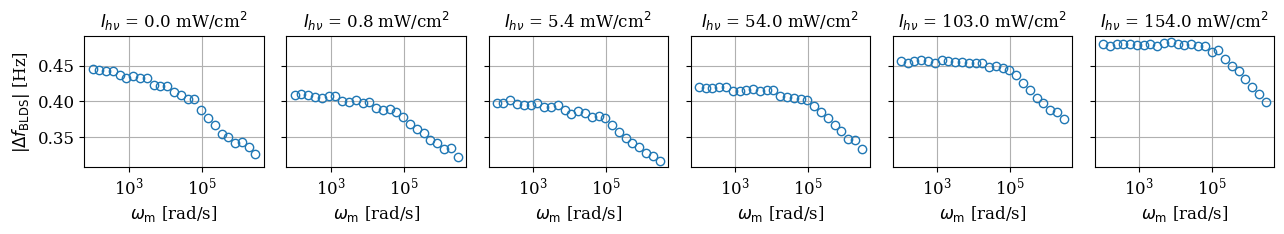

In [31]:
p = D.plotdata()

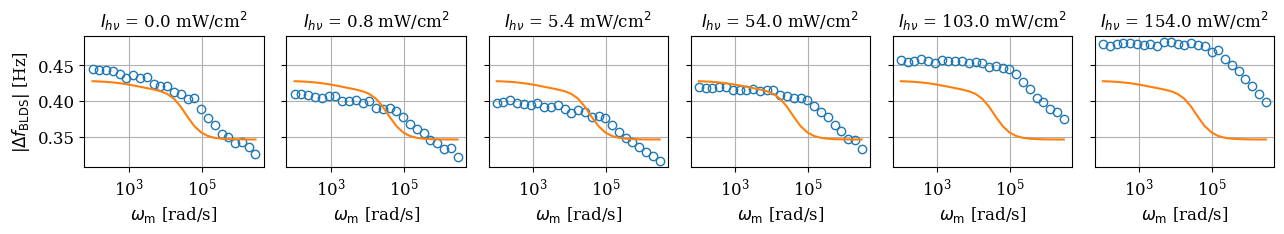

In [32]:
D.fitguess(290, 1e2, 20)
p = D.plotdata()

In [33]:
D.fit()

fitting dataset A
fitting dataset B
fitting dataset C
fitting dataset D
fitting dataset E
fitting dataset F


Show the best fit lines.

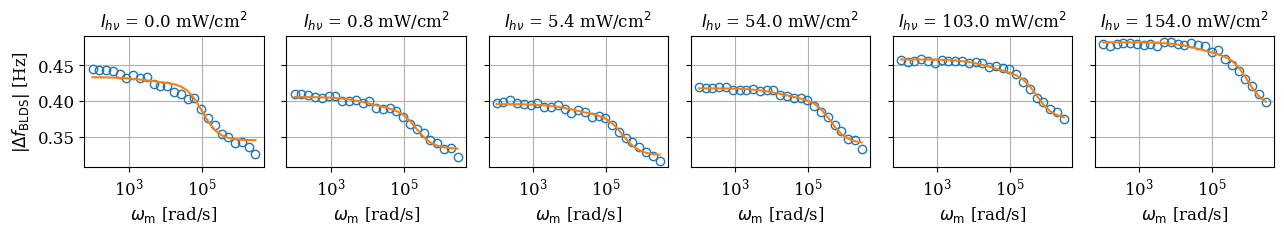

In [34]:
fig['04'] = D.plotdata()

Print out the findings.

In [35]:
D.findings

{'separation': {'x': array([  0.  ,   0.84,   5.4 ,  54.  , 103.  , 154.  ]) <Unit('milliwatt / centimeter ** 2')>,
  'y': array([290.30082711, 293.72242084, 296.34220555, 291.60239001,
         282.57543678, 278.63418802]) <Unit('nanometer')>,
  'yerr': array([0.86502958, 0.52214306, 0.49616649, 0.43133822, 0.42705879,
         0.60196377]) <Unit('nanometer')>},
 'conductivity': {'x': array([  0.  ,   0.84,   5.4 ,  54.  , 103.  , 154.  ]) <Unit('milliwatt / centimeter ** 2')>,
  'y': array([3.10783059e-06, 5.25067003e-06, 7.07606962e-06, 1.05550303e-05,
         1.28514402e-05, 2.40412213e-05]) <Unit('siemens / meter')>,
  'yerr': array([4.71939572e-07, 5.82590499e-07, 6.92221621e-07, 8.21311233e-07,
         1.01862569e-06, 2.22774947e-06]) <Unit('siemens / meter')>},
 'density': {'x': array([  0.  ,   0.84,   5.4 ,  54.  , 103.  , 154.  ]) <Unit('milliwatt / centimeter ** 2')>,
  'y': array([4.86238441e+22, 1.13565208e+22, 1.27864511e+22, 1.44228587e+22,
         1.09779566e+22, 1.

Make plot of the findings.

In [36]:
def plotBLDSfindings(D):
    """Plot the fit results: calculated conductivity and best-fit separation, conductivity, and charge denstiy versus light intensity."""

    fig, axes = plt.subplots(figsize=(3*2.3, 2.50), ncols=3)
    opts = dict(marker='o', mfc='w', ms=4, capsize=3, linestyle='none')
    
    for index, finding in enumerate(['conductivity', 'density', 'separation']):
    
        if finding == 'conductivity':
            ylabel=r'$\sigma$ [$\mu$S/m]'
            yunit='uS/m'
            ydiv=1
        elif finding == 'separation':
            ylabel=r'$d$ [nm]'
            yunit='nm'
            ydiv=1
        elif finding == 'density':
            ylabel=r'$\rho$ [$10^{16}$ cm$^{-3}$]'
            yunit='1/cm^3'
            ydiv=1e16
            
        axes[index].errorbar(
            D.findings[finding]['x'].to('mW/cm^2').magnitude, 
            D.findings[finding]['y'].to(yunit).magnitude/ydiv,
            yerr=D.findings[finding]['yerr'].to(yunit).magnitude/ydiv,
            **opts)
    
        # axes[index].set_xscale('log')
        axes[index].set_ylabel(ylabel)
        axes[index].set_xlabel(r'$I_{h \nu}$ [mW/cm$^2$]')
        axes[index].grid()
    
    fig.tight_layout()
    
    return fig

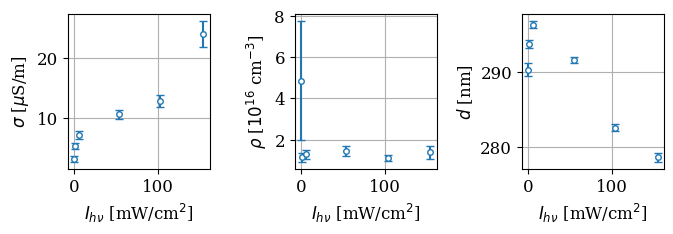

In [37]:
fig['05'] = plotBLDSfindings(D)

Examine all the fit results, looking for correlatations.

In [38]:
for key in D.database.keys():
    print('-'*20)
    print(' dataset {:}'.format(key))
    print(' I = {:} mW/cm^2'.format(D.database[key]['I [mW/cm^2]']))
    print('-'*20)
    display(D.database[key]['result'])

--------------------
 dataset A
 I = 0 mW/cm^2
--------------------


--------------------
 dataset B
 I = 0.84 mW/cm^2
--------------------


--------------------
 dataset C
 I = 5.4 mW/cm^2
--------------------


--------------------
 dataset D
 I = 54 mW/cm^2
--------------------


--------------------
 dataset E
 I = 103 mW/cm^2
--------------------


--------------------
 dataset F
 I = 154 mW/cm^2
--------------------


# Save all figures

In [39]:
for num in fig.keys():
    figname = THIS + "Fig-" + num
    fig[num].savefig(figname + '.png', dpi=300)
    fig[num].savefig(figname + '.pdf')